# The Task is to create Decision Tree Classifier

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd

In [2]:
#Importing the data
data=pd.read_csv('C:\\Users\\chanakya balemarthy\\Pictures\\DATASETS\\Iris (1).csv')

In [3]:
#Checking the data with first 3 records
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
#checking the  number of rows and columns of data
data.shape

(150, 6)

In [5]:
#checking whether there is any missing value
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#summary of the data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#Checking the types of features
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [8]:
#exploring the 'object' variable i.e, Species
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#importing thelibraries required for visualiztion
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

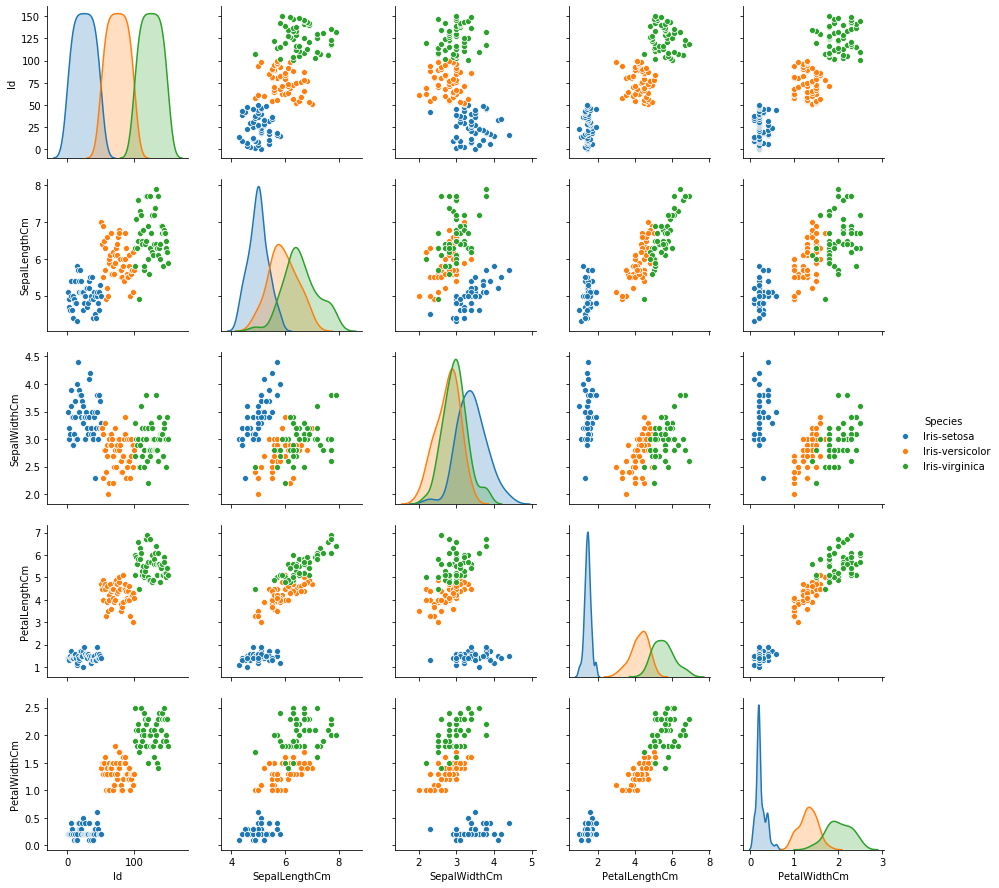

In [10]:
sns.pairplot(data,hue='Species')

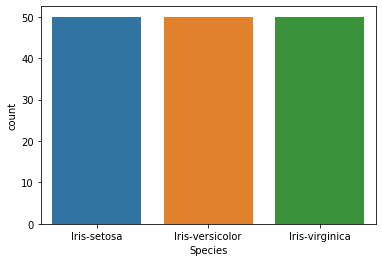

In [11]:
sns.countplot(data['Species'])

In [12]:
#removing the unwanted columns
data.drop('Id',axis=1,inplace=True)

In [13]:
#seperating the dependent and independent variables
x = data.iloc[:,1:-1]
y = data.iloc[:,-1]


In [14]:
#converting the categorical target variable into numeric variable
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [15]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [16]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=5,criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [17]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(y_test,y_test_pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

In [19]:
accuracy_score(y_test,y_test_pred)

0.9666666666666667

Well, we got a classification rate of 96.7%, considered as good accuracy.

Text(0.5, 1.0, 'Decision Tree')

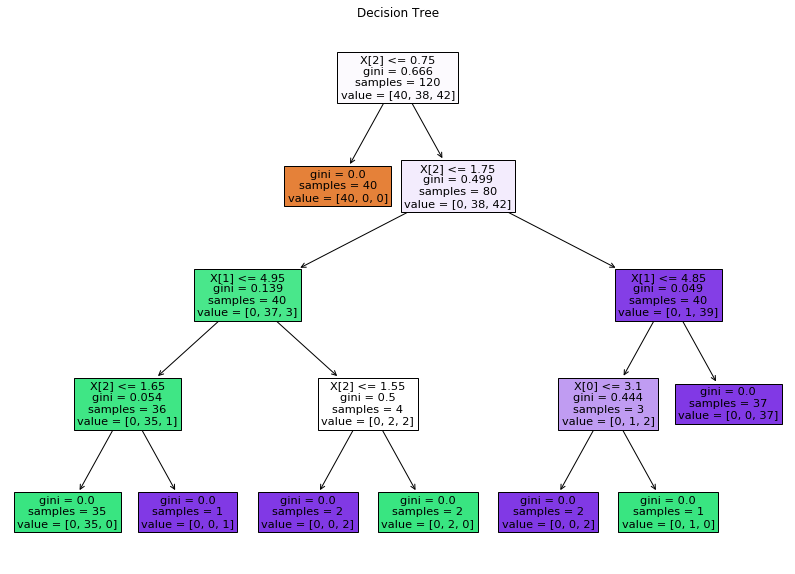

In [20]:
from sklearn import tree
plt.figure(figsize=(14,10))
tree.plot_tree(model,filled=True)
plt.title("Decision Tree")